# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

renda = pd.read_csv('previsao_de_renda.csv')
renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

In [4]:
numeric_renda = renda.select_dtypes(include=['number'])
numeric_renda.corrwith(renda['renda'])

Unnamed: 0               0.007646
index                   -0.001740
qtd_filhos               0.009567
idade                    0.042570
tempo_emprego            0.394235
qt_pessoas_residencia    0.020977
renda                    1.000000
dtype: float64

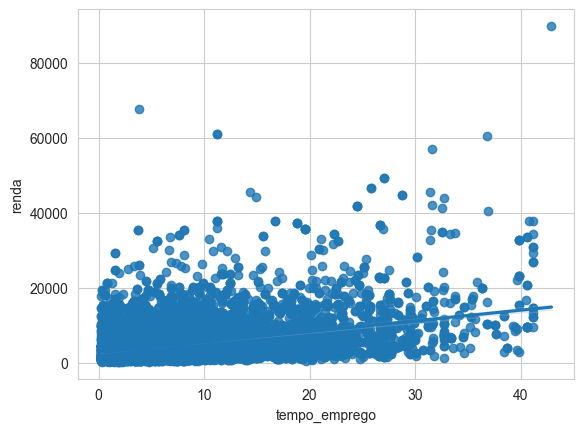

In [5]:
_ = sns.regplot(x='tempo_emprego', y='renda', data = renda)

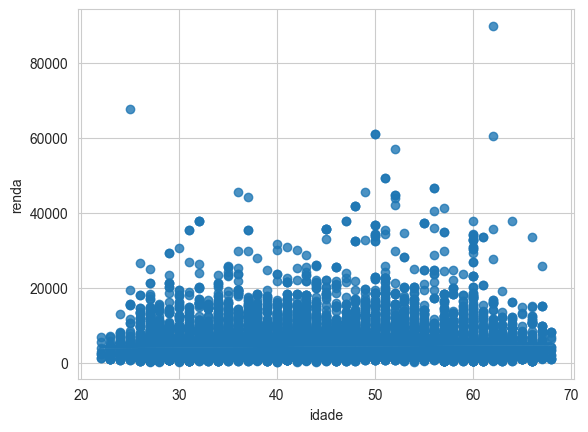

In [6]:
_ = sns.regplot(x='idade', y='renda', data = renda)

3) Na sua opinião, há outliers na variável renda?

Sim, existem alguns outliers acima de 40000-60000 que estão muito acima da média

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [7]:
renda_log = renda.copy().select_dtypes(include=['number'])
renda_log['renda_log'] = np.log(renda_log['renda'])

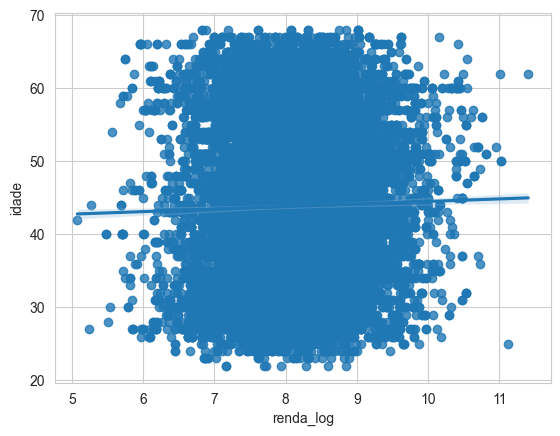

In [31]:
_ = sns.regplot(x='renda_log', y='idade', data = renda_log)

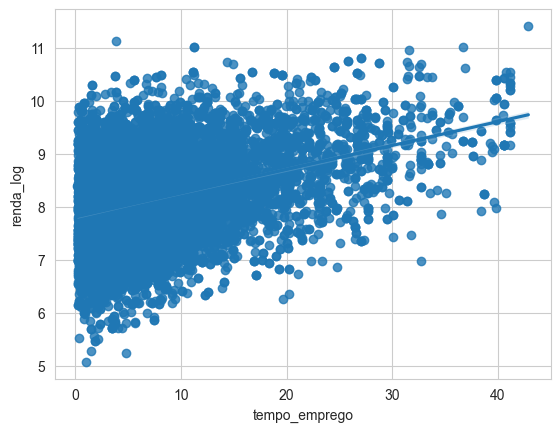

In [32]:
_ = sns.regplot(x='tempo_emprego', y='renda_log', data = renda_log)

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

No caso de idade piorou, mas no caso de tempo de emprego ajudou a visualizar a relação